In [2]:
# python 讀取 .mat file
#https://www.kaggle.com/crawford/reading-mat-files-into-python
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

# load the information in the file in a format that python can interpret
matData = sio.loadmat("data.mat")

#print(matData)
matData.items() # 得知有哪些 items

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Oct 18 14:33:03 2006'), ('__version__', '1.0'), ('__globals__', []), ('x', array([[0.   ],
       [0.001],
       [0.002],
       ...,
       [0.998],
       [0.999],
       [1.   ]])), ('y', array([[1.11889485],
       [1.24080293],
       [1.2305603 ],
       ...,
       [7.44260211],
       [7.36491736],
       [7.34314766]]))])

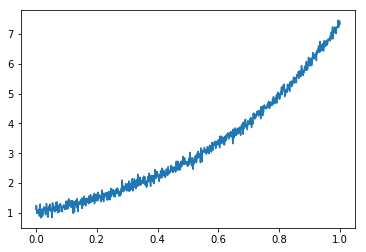

In [3]:
### Q1-2 ###
dataX = np.array(matData["x"])
#print(dataX)
dataY = np.array(matData["y"])
#print(dataY)

#matplotlib 教學
#https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-5%E8%AC%9B-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96-matplotlib-seaborn-plotly-75cd353d6d3f
plt.plot(dataX, dataY)

[[1001.      500.5   ]
 [ 500.5     333.8335]]
[[3200.68327015]
 [2100.24762532]]
[[0.2070272 ]
 [5.98091717]]


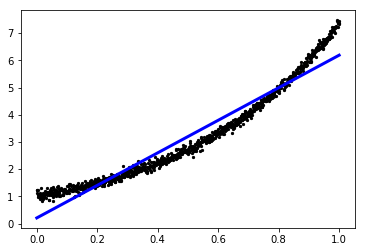

In [14]:
#線性代數: AT Ax' = AT b, Ax' = 所求
#a + bx = y
#a + b*2 = 3
#a + b*3 = 7
#...
temp = []
for element in dataX:
#    print(element[0])
    temp.append([1, element[0]])
A = np.array(temp)
b = dataY
#print(A)

#python 的 matrix 運算
#https://medium.com/pyradise/%E4%BD%BF%E7%94%A8-python-%E4%BE%86%E8%AA%8D%E8%AD%98%E7%9F%A9%E9%99%A3-915376207187
ATA = A.T.dot(A)
ATb = A.T.dot(b)
print(ATA)
print(ATb)

# (ATA)^-1 (ATA) x = (ATA)^-1 (ATb)
x = np.linalg.inv(ATA).dot(ATb)

predictY = dataX * x[1] + x[0]

plt.scatter(dataX, dataY, color="black", s=5)
plt.plot(dataX, predictY, color="blue", linewidth=3)
print(x)

[[1001.          500.5         333.8335    ]
 [ 500.5         333.8335      250.50025   ]
 [ 333.8335      250.50025     200.50033333]]
[[3200.68327015]
 [2100.24762532]
 [1599.92589411]]
[[1.17894599]
 [0.14356709]
 [5.83735008]]


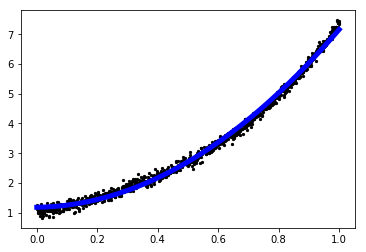

In [13]:
### Q1-3 ###
#同 Q1-3 的運算
#線性代數: AT Ax' = AT b, Ax' = 所求
#a + bx + cx^2 = y
#a + b*2 + c*4 = 3
#a + b*3 + c*9 = 7
#...
temp = []
for element in dataX:
#    print(element[0])
    temp.append([1, element[0], element[0]*element[0]])
A = np.array(temp)
b = dataY
#print(A)

ATA = A.T.dot(A)
ATb = A.T.dot(b)
print(ATA)
print(ATb)

# (ATA)^-1 (ATA) x = (ATA)^-1 (ATb)
x = np.linalg.inv(ATA).dot(ATb)
predictY = dataX*dataX*x[2] + dataX * x[1] + x[0]

plt.scatter(dataX, dataY, color="black", s=5)
plt.plot(dataX, predictY, color="blue", linewidth=5)
print(x)

1 2 3
[1.13838595] [0.27386558] [5.65114009]
[1.17267797] [0.17244681] [5.77708797]
[1.179751] [0.1591154] [5.7947025]
[1.18194751] [0.15754143] [5.80170538]
[1.18144187] [0.15487383] [5.80211695]
[1.18173352] [0.15383541] [5.80352331]
[1.18279607] [0.15486729] [5.80691142]
[1.18280316] [0.15469165] [5.80693716]
[1.18255134] [0.15471744] [5.8072515]
[1.18255918] [0.15447338] [5.80739315]
[1.18256694] [0.15459021] [5.80748817]
[1.18257457] [0.15443875] [5.80793354]
[1.18334563] [0.15197926] [5.80935164]
[1.18335012] [0.15251495] [5.80946619]
[1.18360878] [0.15254088] [5.80949818]
[1.18361179] [0.1525866] [5.81158575]
[1.1836153] [0.15278914] [5.81066913]
[1.18361844] [0.1509977] [5.80965003]
[1.18337062] [0.15369022] [5.81026334]
[1.18387603] [0.15340641] [5.81119952]
[1.18337722] [0.15259916] [5.81073226]
[1.18338048] [0.15245219] [5.8098104]
[1.18388237] [0.15321889] [5.81208937]
[1.18413361] [0.15228532] [5.81258909]
[1.18388652] [0.1517527] [5.81193683]
[1.18339187] [0.15122504] [5.

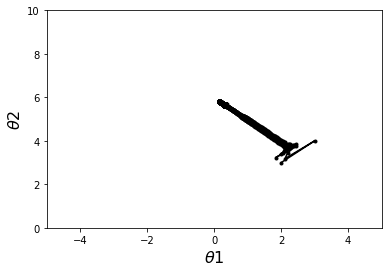

[array([1.18470148]), array([0.15096833]), array([5.81428444])]


In [6]:
### Q1-4 ###
#Loss function = sum(i, n){abs(yi - (a+b*x+c*x^2))}
#θ0: Σ (-1)*(yi - θ0 - x*θ1 - x^2*θ2) / |yi - θ0 - x*θ1 - x^2*θ2| 
#θ1: Σ (-x)*(yi - θ0 - x*θ1 - x^2*θ2) / |yi - θ0 - x*θ1 - x^2*θ2| 
#θ2: Σ (-x^2)*(yi - θ0 - x*θ1 - x^2*θ2) / |yi - θ0 - x*θ1 - x^2*θ2| 

#initial values
θ0 = 1
θ1 = 2
θ2 = 3
lr = 1
iteration = 100000

θ0Lr = 0.0
θ1Lr = 0.0
θ2Lr = 0.0

θ0_history = [θ0]
θ1_history = [θ1]
θ2_history = [θ2]    

for i in range(iteration):
    θ0Grad = 0.0
    θ1Grad = 0.0
    θ2Grad = 0.0
    
    if i % 500 == 0:
        print(θ0, θ1, θ2)
        
    #計算 gradient
    for n in range(len(dataX)):
        θ0Grad += (-1)*(dataY[n] - θ0 - dataX[n]*θ1 - dataX[n]*dataX[n]*θ2) / abs(dataY[n] - θ0 - dataX[n]*θ1 - dataX[n]*dataX[n]*θ2)   
        θ1Grad += (-dataX[n])*(dataY[n] - θ0 - dataX[n]*θ1 - dataX[n]*dataX[n]*θ2) / abs(dataY[n] - θ0 - dataX[n]*θ1 - dataX[n]*dataX[n]*θ2)
        θ2Grad += (-dataX[n]*dataX[n])*(dataY[n] - θ0 - dataX[n]*θ1 - dataX[n]*dataX[n]*θ2) / abs(dataY[n] - θ0 - dataX[n]*θ1 - dataX[n]*dataX[n]*θ2)

    θ0Lr += θ0Grad ** 2
    θ1Lr += θ1Grad ** 2
    θ2Lr += θ2Grad ** 2
    
    #更新 gradient
    θ0 = θ0 - lr * θ0Grad/np.sqrt(θ0Lr)
    θ1 = θ1 - lr * θ1Grad/np.sqrt(θ1Lr)
    θ2 = θ2 - lr * θ2Grad/np.sqrt(θ2Lr)
    
    # Store parameters for plotting
    θ0_history.append(θ0)
    θ1_history.append(θ1)
    θ2_history.append(θ2)
    
#plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(θ1_history, θ2_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-5,5)
plt.ylim(0,10)
plt.xlabel(r'$θ1$', fontsize=16)
plt.ylabel(r'$θ2$', fontsize=16)
plt.show()

print([θ0, θ1, θ2])


[1.1847014757699945, 0.1509683288837641, 5.814284443062063]


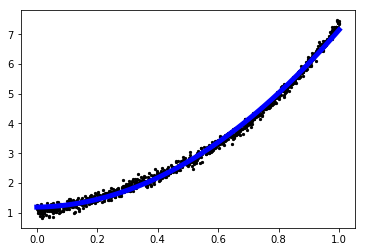

In [12]:
predictY = dataX*dataX*θ2 + dataX * θ1 + θ0

plt.scatter(dataX, dataY, color="black", s=5)
plt.plot(dataX, predictY, color="blue", linewidth=5)
print([θ0[0], θ1[0], θ2[0]])